In [312]:
import pandas as pd

import matplotlib.pyplot as plt

from IPython.display import display
from IPython.core.display import display, HTML

display(HTML("""
<style>
div.output_scroll {
    box-shadow: none;
    webkit-box-shadow: none;
    overflow-y: scroll;
    height: 500px;  # Вы можете настроить высоту по своему усмотрению
}
</style>
"""))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/var/folders/9y/1_m0916n3f926sbs3ljhhd300000gn/T/ipykernel_21570/3929073166.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


/var/folders/9y/1_m0916n3f926sbs3ljhhd300000gn/T/ipykernel_21570/3929073166.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Введите сумму кредита в рублях: 12290000
Введите срок (лет): 30
Введите ипотечную ставку в % : 3.6
Введите предполагаемую ставку по инфляции (%): 12


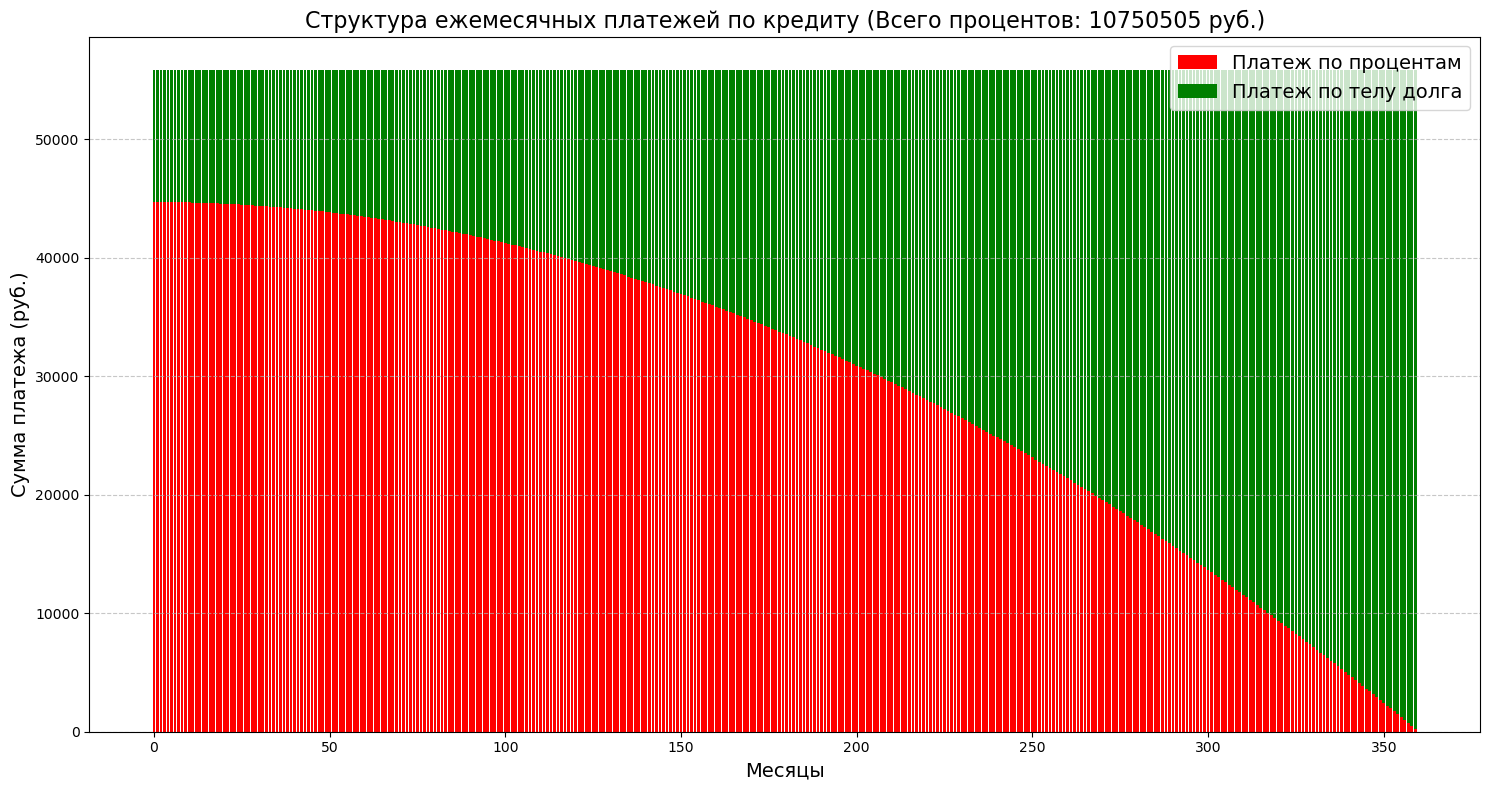

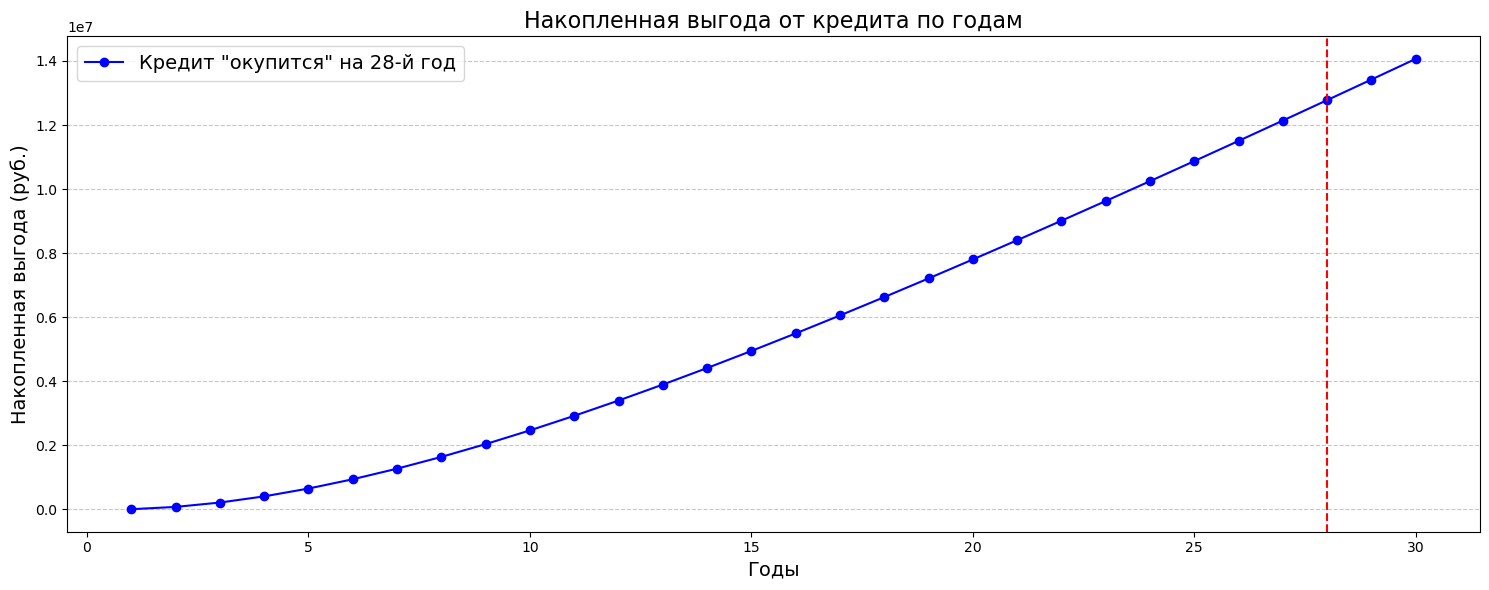

,Месяц,Платеж по процентам,Платеж по телу долга,Общий платеж,Оставшийся долг
0,1,44701,11175,55876,12278825
1,2,44700,11176,55876,12267649
2,3,44699,11177,55876,12256473
3,4,44698,11178,55876,12245294
4,5,44695,11181,55876,12234114
5,6,44692,11184,55876,12222930
6,7,44688,11188,55876,12211742
7,8,44684,11192,55876,12200550
8,9,44679,11197,55876,12189353
9,10,44673,11203,55876,12178150


____________________________________________________________________________________________________________________
Платеж в месяц составит: 55876 рублей
Выгода кредита составляет: 14066109 рублей за 30 лет
Выгода взятого кредита составляет в процентах: 114.45 %


In [319]:
sum_credit = int(input('Введите сумму кредита в рублях: '))
years = int(input('Введите срок (лет): '))
stavka = float(input('Введите ипотечную ставку в % : '))
inflation = float(input('Введите предполагаемую ставку по инфляции (%): '))

# Функция для расчета аннуитетного платежа
def annuity_payment(PV, rate, n):
    return PV * rate / (1 - (1 + rate)**-n)

# Рассчитываем ежемесячный платеж по кредиту
monthly_rate = stavka / 100 / 12  
n_payments = years * 12  
monthly_payment = annuity_payment(sum_credit, monthly_rate, n_payments)

# Расчет ежемесячных платежей по кредиту
remaining_principal = sum_credit
new_interest_payments = []
new_principal_payments = []


for month in range(n_payments):
    # Параболическое уменьшение платежа по процентам
    interest_payment_portion = 0.8 - 0.8 * (month/n_payments)**2
    interest_payment = monthly_payment * interest_payment_portion
    
    principal_payment = monthly_payment - interest_payment
    
    new_interest_payments.append(interest_payment)
    new_principal_payments.append(principal_payment)
    
    remaining_principal -= principal_payment

total_interest_paid = sum(new_interest_payments)

# Рассчет накопленной выгоды от кредита по годам
annual_benefits = []
cumulative_payment_without_inflation = 0
cumulative_payment_with_inflation = 0
break_even_point = None  

for year in range(years):
    annual_payment_without_inflation = monthly_payment * 12
    cumulative_payment_without_inflation += annual_payment_without_inflation
    
    annual_payment_with_inflation = annual_payment_without_inflation * ((inflation/100) + 1) ** (-year)
    cumulative_payment_with_inflation += annual_payment_with_inflation
    
    annual_benefit = cumulative_payment_without_inflation - cumulative_payment_with_inflation
    annual_benefits.append(annual_benefit)
    
    if break_even_point is None and annual_benefit >= sum_credit:
        break_even_point = year + 1
        
# Учитываем ситуацию, когда ипотека не окупается
if break_even_point and break_even_point <= years:
    legend_label = f'Кредит "окупится" на {break_even_point}-й год'
else:
    legend_label = 'Кредит не окупится за указанный срок'


total_benefit = annual_benefits[-1]  # выгода на последний год

total_interest_paid = sum(new_interest_payments)

# Визуализация структуры платежей
plt.figure(figsize=(15, 8))
plt.bar(range(n_payments), new_interest_payments, color='red', label='Платеж по процентам')
plt.bar(range(n_payments), new_principal_payments, bottom=new_interest_payments, color='green', label='Платеж по телу долга')
plt.title(f'Структура ежемесячных платежей по кредиту (Всего процентов: {total_interest_paid:.0f} руб.)', fontsize=16)
plt.xlabel('Месяцы', fontsize=14)
plt.ylabel('Сумма платежа (руб.)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

# Построение графика накопленной выгоды от кредита по годам
plt.figure(figsize=(15, 6))
plt.plot(range(1, years+1), annual_benefits, marker='o', linestyle='-', color='blue')
if break_even_point and break_even_point <= years:
    plt.axvline(x=break_even_point, color='red', linestyle='--')
plt.title('Накопленная выгода от кредита по годам', fontsize=16)
plt.xlabel('Годы', fontsize=14)
plt.ylabel('Накопленная выгода (руб.)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([legend_label], fontsize=14)
plt.tight_layout()
plt.show()

# Создание таблицы платежей
payment_data = {
    'Месяц': list(range(1, n_payments + 1)),
    'Платеж по процентам': [round(val) for val in new_interest_payments],
    'Платеж по телу долга': [round(val) for val in new_principal_payments],
    'Общий платеж': [round(i + j) for i, j in zip(new_interest_payments, new_principal_payments)],
    'Оставшийся долг': [round(sum_credit - sum(new_principal_payments[:index+1])) for index in range(n_payments)]
}

df_payments = pd.DataFrame(payment_data)
display(df_payments)


# Вывод результатов
print("____________________________________________________________________________________________________________________")
print(f"Платеж в месяц составит: {monthly_payment:.0f} рублей")
print(f"Выгода кредита составляет: {total_benefit:.0f} рублей за {years} лет")
print(f"Выгода взятого кредита составляет в процентах: {(total_benefit/sum_credit)*100:.2f} %")
